<a href="https://colab.research.google.com/github/Shivam311201/Beginning-with-AI-ML/blob/master/BasicStatistics/Outlier_Removal_using_Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Removing Outliers in property prices of Banglore

In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv("/content/sample_data/bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [6]:
lowThreshold, highThreshold=df['price_per_sqft'].quantile([0.001,0.999])

In [8]:
df=df[(df['price_per_sqft']>lowThreshold)&(df['price_per_sqft']<highThreshold)]
df['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [9]:
max_limit = df['price_per_sqft'].mean() + 4*df['price_per_sqft'].std()
min_limit = df['price_per_sqft'].mean() - 4*df['price_per_sqft'].std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [10]:
df=df[(df['price_per_sqft']>min_limit)&(df['price_per_sqft']<max_limit)]
df['price_per_sqft'].describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

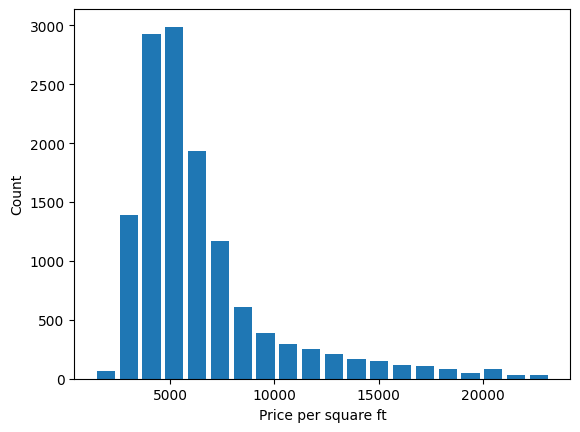

In [14]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

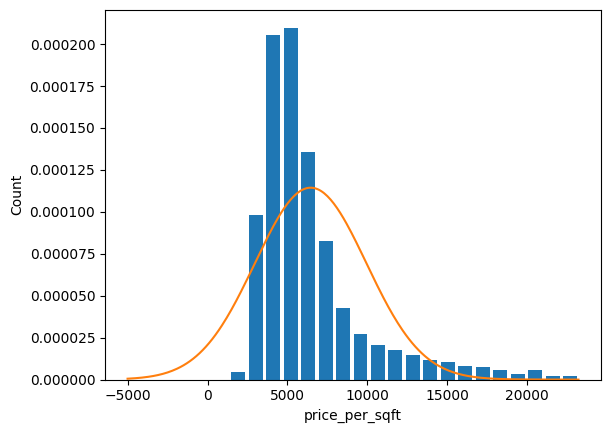

In [15]:
from scipy.stats import norm
import numpy as np

plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000, df['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng,df['price_per_sqft'].mean(),df['price_per_sqft'].std()))

In [16]:
df['zscore'] = (df['price_per_sqft']-df['price_per_sqft'].mean())/df['price_per_sqft'].std()

In [17]:
df = df[(df.zscore>-4)&(df.zscore<4)]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [18]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,1524.965601,2.653653,103.394417,2.764601,6348.153383,-0.029009
std,937.363873,1.252351,109.963795,1.198855,3269.007986,0.937304
min,250.000000,1.000000,8.000000,1.000000,1379.000000,-1.453787
25%,1100.000000,2.000000,49.970000,2.000000,4251.000000,-0.630314
50%,1272.000000,2.000000,70.000000,3.000000,5394.000000,-0.302588
75%,1660.000000,3.000000,115.000000,3.000000,7153.000000,0.201760
max,30400.000000,27.000000,2200.000000,27.000000,20357.000000,3.987669


Text(0, 0.5, 'Count')

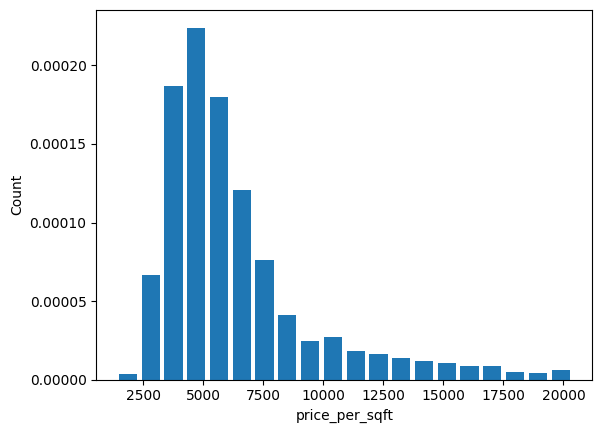

In [19]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')